# Inverse Transform Sampling applied to Latin Hypercube Sampling

https://en.wikipedia.org/wiki/Inverse_transform_sampling

https://stats.stackexchange.com/questions/269163/generating-a-sample-using-inverse-cdf-method-in-python/269171

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

First, generate a sample in the interval `[0,1]`. Use `NumPy`'s `random.rand()` or `random.uniform()` functions for instance.

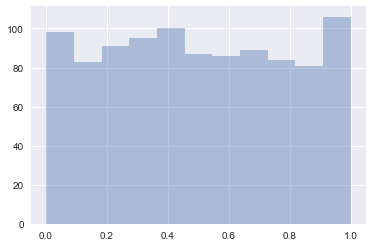

In [4]:
# Generate random numbers following a uniform distribution
N = 1000
q = np.random.uniform(0, 1, N) # in [0, 1] range, q = np.random.rand(N) gives similar results

# Plot distribution
plt.figure(figsize=(6, 4));
sns.distplot(q, kde=False);

Second, transform the sample with the help of the inverse CDF function. `SciPy` provides these functions under the signature `distribution.ppf(quantile, parameter1, parameter2,...)`.

Example using normal distribution with μ=5 and σ=0.5

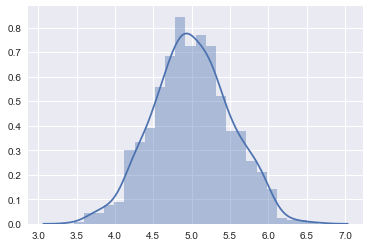

In [5]:
# Percent point function (inverse of cdf — percentiles).
result = norm.ppf(q, loc=5, scale=0.5)

# Plot resulting distribution
plt.figure(figsize=(6, 4));
sns.distplot(result);

## LHS using pyDOE

https://pythonhosted.org/pyDOE/randomized.html

In [6]:
from pyDOE import lhs

In [7]:
# Latin hypercube sampling with 5 factors and 10 samples
sample = pd.DataFrame(lhs(5, samples=100), columns=['F_1','F_2','F_3','F_4','F_5'])
sample[:10]

,F_1,F_2,F_3,F_4,F_5
0,0.673975,0.145667,0.118923,0.788445,0.223036
1,0.146497,0.604052,0.549541,0.412689,0.737441
2,0.120977,0.438419,0.730274,0.250944,0.057528
3,0.645606,0.429050,0.851047,0.677295,0.201661
4,0.171498,0.075978,0.790038,0.128407,0.825455
5,0.668400,0.543337,0.285699,0.554743,0.851329
6,0.948965,0.445299,0.570659,0.685568,0.614244
7,0.542234,0.017351,0.489604,0.474372,0.956362
8,0.888868,0.381552,0.306194,0.738890,0.868512
9,0.613642,0.110913,0.698211,0.118868,0.639027


In [9]:
# Assign normal distribution parameters to each factor
dists = {
    'F_1': {'mean': 1, 'std': 0.1},
    'F_2': {'mean': 2, 'std': 0.5},
    'F_3': {'mean': 3, 'std': 1.0},
    'F_4': {'mean': 4, 'std': 0.25},
    'F_5': {'mean': 5, 'std': 0.8}
}
dists

{'F_1': {'mean': 1, 'std': 0.1},
 'F_2': {'mean': 2, 'std': 0.5},
 'F_3': {'mean': 3, 'std': 1.0},
 'F_4': {'mean': 4, 'std': 0.25},
 'F_5': {'mean': 5, 'std': 0.8}}

In [10]:
# Customizing sample with given statistical distributions
sample_mod = sample.apply(lambda x: norm.ppf(x, loc=dists[x.name]['mean'], scale=dists[x.name]['std']))
sample_mod[:10]

,F_1,F_2,F_3,F_4,F_5
0,1.045092,1.472399,1.819611,4.200260,4.390415
1,0.894842,2.131924,3.124501,3.944842,5.508381
2,0.882988,1.922511,3.613641,3.832119,3.739303
3,1.037348,1.910603,4.040935,4.115037,4.331437
4,0.905174,1.283673,3.806554,3.716512,5.749085
5,1.043550,2.054422,2.434007,4.034414,5.833720
6,1.163490,1.931226,3.178051,4.120832,5.232318
7,1.010606,0.944090,2.973938,3.983929,6.367958
8,1.122053,1.849296,2.493331,4.159981,5.895507
9,1.028882,1.389157,3.519261,3.704833,5.284688


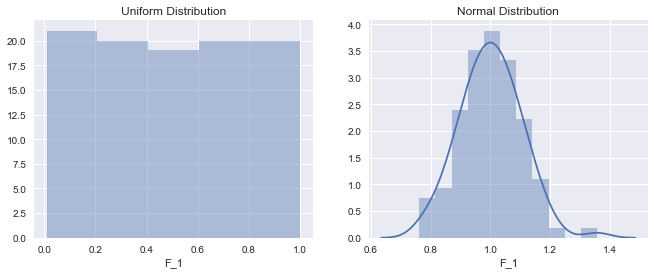

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
sns.distplot(sample['F_1'], kde=False, ax=ax1);
sns.distplot(sample_mod['F_1'], ax=ax2);
ax1.set_title('Uniform Distribution');
ax2.set_title('Normal Distribution');

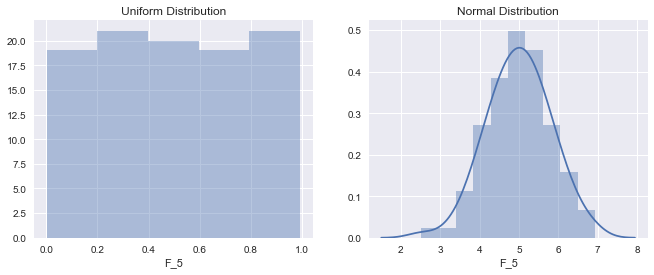

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
sns.distplot(sample['F_5'], kde=False, ax=ax1);
sns.distplot(sample_mod['F_5'], ax=ax2);
ax1.set_title('Uniform Distribution');
ax2.set_title('Normal Distribution');